In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.listdir('./'))

['.ipynb_checkpoints', '120-years-of-olympic-history-athletes-and-results.zip', 'data', 'delete_me.db', 'Formula 1 dataset - Project.ipynb', 'kaggle', 'Lesson 13.ipynb', 'Lesson 14.ipynb', 'Lesson 15.ipynb', 'Lesson 16.ipynb', 'project', 'Python for Data Analysis.pdf', 'test_file.txt']


In [3]:
!ls project/

circuits.csv		  drivers.csv	       qualifying.csv  status.csv
constructorResults.csv	  driverStandings.csv  races.csv
constructors.csv	  lapTimes.csv	       results.csv
constructorStandings.csv  pitStops.csv	       seasons.csv


In [4]:
data = pd.read_csv('./project/circuits.csv', encoding='ISO-8859-15')
data.loc[[3, 17, 19]]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.5700,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
17,18,interlagos,AutÌ_dromo JosÌ© Carlos Pace,SÌ£o Paulo,Brazil,-23.7036,-46.69970,NaN,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...
19,20,nurburgring,NÌ_rburgring,NÌ_rburg,Germany,50.3356,6.94750,NaN,http://en.wikipedia.org/wiki/N%C3%BCrburgring


In [5]:
races_data = pd.read_csv('./project/races.csv', encoding='ISO-8859-15')
circuits_data = pd.read_csv('./project/circuits.csv', encoding='ISO-8859-15')

In [6]:
races_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
raceId       997 non-null int64
year         997 non-null int64
round        997 non-null int64
circuitId    997 non-null int64
name         997 non-null object
date         997 non-null object
time         266 non-null object
url          997 non-null object
dtypes: int64(4), object(4)
memory usage: 62.4+ KB


In [7]:
circuits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
circuitId     73 non-null int64
circuitRef    73 non-null object
name          73 non-null object
location      73 non-null object
country       73 non-null object
lat           73 non-null float64
lng           73 non-null float64
alt           1 non-null float64
url           73 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 5.2+ KB


In [8]:
data = pd.merge(races_data, circuits_data, on="circuitId", how="left")

In [9]:
data.head(3).T

,0,1,2
raceId,1,2,3
year,2009,2009,2009
round,1,2,3
circuitId,1,2,17
name_x,Australian Grand Prix,Malaysian Grand Prix,Chinese Grand Prix
date,2009-03-29,2009-04-05,2009-04-19
time,06:00:00,09:00:00,07:00:00
url_x,http://en.wikipedia.org/wiki/2009_Australian_G...,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
circuitRef,albert_park,sepang,shanghai
name_y,Albert Park Grand Prix Circuit,Sepang International Circuit,Shanghai International Circuit


#### How the number of championship races increased over the years?

In [10]:
num_of_races = data[['raceId','year']].groupby('year').count().reset_index()
num_of_races.head()

,year,raceId
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9


Text(0, 0.5, '# of Races')

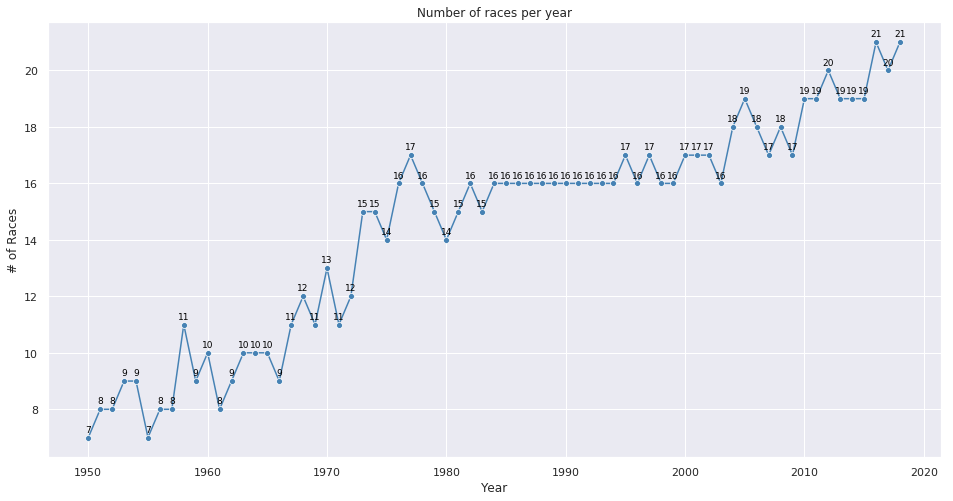

In [11]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.lineplot(x="year", y="raceId", data=num_of_races, color="steelblue", marker="o")

# adding chart title
plt.title('Number of races per year')

# adding labels on bar chart
for index, row in num_of_races.iterrows():
    plt.text(row.year, row.raceId + 0.2, row.raceId, color='black', ha="center", size=9)

# adding custom labels for axes
plt.xlabel("Year")
plt.ylabel("# of Races")


#### Which circuit held the most races over the history of F1?

In [12]:
races_by_circuit = pd.merge(
    data[['circuitId','year']].groupby('circuitId').count(),
    circuits_data[['circuitId','name']],
    on="circuitId", how="left"
).sort_values(by=['year'], ascending=False).reset_index(drop=True)

races_by_circuit.head()

,circuitId,year,name
0,14,68,Autodromo Nazionale di Monza
1,6,65,Circuit de Monaco
2,9,52,Silverstone Circuit
3,13,51,Circuit de Spa-Francorchamps
4,20,40,NÌ_rburgring


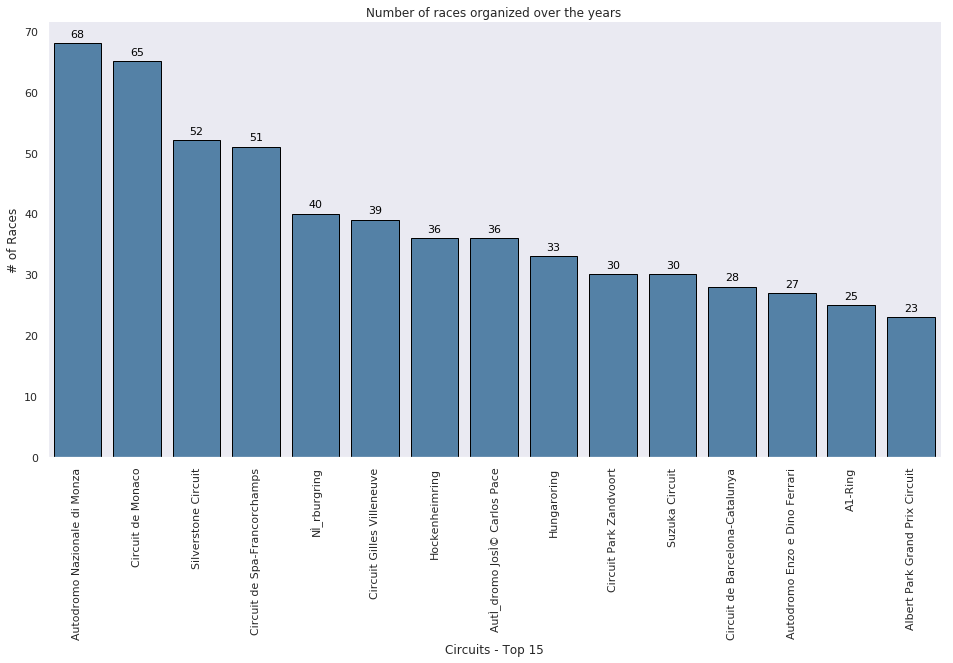

In [13]:
top_n = 15

plt.figure(figsize=(16, 8))
sns.set(style="dark")
sns.barplot(x="name", y="year", data=races_by_circuit[:top_n], color="steelblue", edgecolor="black")

# adding chart title
plt.title('Number of races organized over the years')

# adding labels on bar chart
for index, row in races_by_circuit[:top_n].iterrows():
    plt.text(row.name, row.year + 1, row.year, color='black', ha="center", size=11)

# adding custom labels for axes
plt.xlabel("Circuits - Top " + str(top_n))
plt.ylabel("# of Races")

# rotating axis labels
plt.xticks(rotation=90)

sns.despine()

#### What circuits held F1 races only once and which year?

In [14]:
exotic_circuits = pd.merge(
    races_by_circuit.loc[(races_by_circuit['year'] == 1)].copy(),
    races_data[['circuitId','year']],
    on="circuitId", how="left"
).sort_values(by=['year_y']).reset_index(drop=True)

cols = {'circuitId': 'Circuit ID', 'year_x':'No. of races', 'name': 'Circuit Name', 'year_y': 'Year'}
exotic_circuits.rename(columns=cols, inplace=True)

exotic_circuits[['Circuit ID', 'Circuit Name', 'Year', 'No. of races']]

,Circuit ID,Circuit Name,Year,No. of races
0,65,Pescara Circuit,1957,1
1,64,Ain Diab,1958,1
2,63,Sebring International Raceway,1959,1
3,62,Monsanto Park Circuit,1959,1
4,61,AVUS,1959,1
5,60,Riverside International Raceway,1960,1
6,57,Zeltweg,1964,1
7,54,Le Mans,1967,1
8,42,Fair Park,1984,1
9,31,Donington Park,1993,1


#### Who won F1 championships each year?

In [15]:
driverstand_data = pd.read_csv('./project/driverStandings.csv', encoding='ISO-8859-15')
driverstand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31726 entries, 0 to 31725
Data columns (total 7 columns):
driverStandingsId    31726 non-null int64
raceId               31726 non-null int64
driverId             31726 non-null int64
points               31726 non-null float64
position             31726 non-null int64
positionText         31726 non-null object
wins                 31726 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.7+ MB


In [16]:
drivers_data = pd.read_csv('./project/drivers.csv', encoding='ISO-8859-15')
drivers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 9 columns):
driverId       842 non-null int64
driverRef      842 non-null object
number         38 non-null float64
code           85 non-null object
forename       842 non-null object
surname        842 non-null object
dob            841 non-null object
nationality    842 non-null object
url            841 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 59.3+ KB


In [17]:
data = pd.merge(
    driverstand_data,
    races_data,
    on="raceId", how="left"
)

yearly_driver_points = pd.merge(
    data,
    drivers_data[['driverId', 'surname']],
    on="driverId", how="left"
).reset_index(drop=True)[['driverId', 'surname','year','points']]

yearly_driver_points = yearly_driver_points.loc[yearly_driver_points.groupby("year")["points"].idxmax()]
yearly_driver_points


,driverId,surname,year,points
27527,642,Farina,1950,30.0
27102,579,Fangio,1951,31.0
26340,647,Ascari,1952,36.0
25898,647,Ascari,1953,34.5
27616,579,Fangio,1954,42.0
24758,579,Fangio,1955,40.0
24237,579,Fangio,1956,30.0
23779,579,Fangio,1957,40.0
23393,578,Hawthorn,1958,42.0
27884,356,Brabham,1959,31.0
